## Background
In this project, we will attempt to generate images in the style of Monet. We will be using the generative adversarial networks architecture, consisting of a generator and discriminator.
At first we will explore a simple DCGAN model, followed by more advanced approaches such as CycleGAN and BigGAN.


## Data Description
The competition's dataset is composed of 4 directories, 2 of which containing tfrec files, and the other 2 jpg files.

In addition to the differing formats, the directories are also seperated to monet style images, and regular photos.

The number of images provided are:

monet_jpg - 300

monet_tfrec - 5

photo_jpg - 7038

photo_tfrec - 20

The images are 256x256 in size with 3 channels (RGB).

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import keras

from keras import layers, ops, initializers

from IPython.display import clear_output


INPUT_BASEPATH = '/kaggle/input/gan-getting-started/'

# Loading the data

In [2]:
def get_filepaths(base_path, extension):
    paths = tf.io.gfile.glob(os.path.join(base_path,f'*.{extension}'))
    # for p in paths:
    #     yield p
    return paths

In [3]:
monet_tfrec_filepaths = get_filepaths(os.path.join(INPUT_BASEPATH,'monet_tfrec'), 'tfrec')
photo_tfrec_filepaths = get_filepaths(os.path.join(INPUT_BASEPATH,'photo_tfrec'), 'tfrec')
monet_jpg_filepaths = get_filepaths(os.path.join(INPUT_BASEPATH,'monet_jpg'), 'jpg')
photo_jpg_filepaths = get_filepaths(os.path.join(INPUT_BASEPATH,'photo_jpg'), 'jpg')

# EDA

In [4]:
print(f"Monet TFREC images count: {len(monet_tfrec_filepaths)}")
print(f"Photo TFREC images count: {len(photo_tfrec_filepaths)}")
print(f"Monet JPG images count: {len(monet_jpg_filepaths)}")
print(f"Photo JPG images count: {len(photo_jpg_filepaths)}")

Monet TFREC images count: 5
Photo TFREC images count: 20
Monet JPG images count: 300
Photo JPG images count: 7038


It seems like the TFREC datasets are quite small, so instead we will use the JPG datasets to train our GAN model

In [5]:
# TODO: Fill this up

# Model Architecture

In [6]:
# TODO : Fill up a description of DCGAN

In [7]:
# discriminator = keras.Sequential(
#     [
#         keras.Input(shape=(256, 256, 3)),
        
#         layers.Conv2D(64, kernel_size=3, strides=2, padding="same"),
#         layers.BatchNormalization(),
#         layers.LeakyReLU(negative_slope=0.2),
#         layers.Dropout(0.5),

#         layers.Conv2D(128, kernel_size=3, strides=2, padding="same"),
#         layers.BatchNormalization(),
#         layers.LeakyReLU(negative_slope=0.2),
#         layers.Dropout(0.5),

#         layers.Conv2D(256, kernel_size=3, strides=2, padding="same"),
#         layers.BatchNormalization(),
#         layers.LeakyReLU(negative_slope=0.2),
#         layers.Dropout(0.5),

#         layers.Conv2D(512, kernel_size=3, strides=2, padding="same"),
#         layers.BatchNormalization(),
#         layers.LeakyReLU(negative_slope=0.2),
#         layers.Dropout(0.5),

#         layers.Flatten(),
#         layers.Dropout(0.5),
#         layers.Dense(1, activation="sigmoid"),
#     ],
#     name="discriminator",
# )
# discriminator.summary()

In [8]:
discriminator = keras.Sequential(
    [
        keras.Input(shape=(64, 64, 3)),
        layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),
    ],
    name="discriminator",
)
discriminator.summary()


Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 128)         │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           8,193 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 404,801 (1.54 MB)

 Trainable params: 404,801 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# latent_dim = 128

# generator = keras.Sequential(
#     [
#         keras.Input(shape=(latent_dim,)),
#         layers.Dense(16 * 16 * 512, use_bias=False),
#         layers.BatchNormalization(),
#         layers.LeakyReLU(negative_slope=0.2),

#         layers.Reshape((16, 16, 512)),
        
        
#         layers.Conv2DTranspose(256, kernel_size=5, strides=2, use_bias=False, padding="same"),
#         layers.BatchNormalization(),
#         layers.LeakyReLU(negative_slope=0.2),
#         layers.Dropout(0.2),
        
#         layers.Conv2DTranspose(128, kernel_size=5, strides=2, use_bias=False, padding="same"),
#         layers.BatchNormalization(),
#         layers.LeakyReLU(negative_slope=0.2),
#         layers.Dropout(0.2),

#         layers.Conv2DTranspose(64, kernel_size=5, strides=2, use_bias=False, padding="same"),
#         layers.BatchNormalization(),
#         layers.LeakyReLU(negative_slope=0.2),
#         layers.Dropout(0.2),

#         layers.Conv2DTranspose(32, kernel_size=5, strides=2, use_bias=False, padding="same"),
#         layers.BatchNormalization(),
#         layers.LeakyReLU(negative_slope=0.2),
#         layers.Dropout(0.2),
        
#         layers.Conv2D(3, kernel_size=5, padding="same", activation="sigmoid"),
#     ],
#     name="generator",
# )
# generator.summary()

In [10]:
latent_dim = 128

generator = keras.Sequential(
    [
        keras.Input(shape=(latent_dim,)),
        layers.Dense(8 * 8 * 128),
        layers.Reshape((8, 8, 128)),
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2D(3, kernel_size=5, padding="same", activation="sigmoid"),
    ],
    name="generator",
)
generator.summary()


Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 8192)                │       1,056,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 16, 16, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 32, 32, 256)         │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 64, 64, 512)         │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 64, 64, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 3)           │          38,403 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,979,651 (15.18 MB)

 Trainable params: 3,979,651 (15.18 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# class GAN(keras.Model):
#     def __init__(self, discriminator, generator, latent_dim):
#         super().__init__()
#         self.discriminator = discriminator
#         self.generator = generator
#         self.latent_dim = latent_dim
#         self.seed_generator = keras.random.SeedGenerator(42)
#         self.freeze_discriminator = False

#     def compile(self, d_optimizer, g_optimizer, loss_fn):
#         super().compile()
#         self.d_optimizer = d_optimizer
#         self.g_optimizer = g_optimizer
#         self.loss_fn = loss_fn
#         self.d_loss_metric = keras.metrics.Mean(name="d_loss")
#         self.g_loss_metric = keras.metrics.Mean(name="g_loss")

#     @property
#     def metrics(self):
#         return [self.d_loss_metric, self.g_loss_metric]
    
#     @tf.function
#     def train_step(self, real_images):
#         # Sample random points in the latent space
#         batch_size = ops.shape(real_images)[0]
#         random_latent_vectors = keras.random.normal(
#             shape=(batch_size, self.latent_dim), seed=self.seed_generator
#         )

#         # Train the discriminator
#         if not self.freeze_discriminator:
#             # Decode them to fake images
#             generated_images = self.generator(random_latent_vectors, training=True)
    
    
#             with tf.GradientTape() as tape:
#                 # Calculate losses for discriminator
#                 generated_image_loss = self.loss_fn(ops.ones((batch_size, 1)), self.discriminator(generated_images,  training=True))
#                 real_image_loss = self.loss_fn(ops.zeros((batch_size, 1)), self.discriminator(real_images, training=True))
    
#                 d_loss = generated_image_loss + real_image_loss
    
#                 # Experimental conditional training, to avoid the discriminator throwing off the model
#                 # if d_loss > 0.1:
#                 grads = tape.gradient(d_loss, self.discriminator.trainable_weights)

#                 self.d_optimizer.apply_gradients(
#                     zip(grads, self.discriminator.trainable_weights)
#                 )

#         # Train the generator
        
#         random_latent_vectors = keras.random.normal(
#             shape=(batch_size, self.latent_dim), seed=self.seed_generator
#         )
        
#         with tf.GradientTape() as tape:
#             generated_images = self.generator(random_latent_vectors, training=True)
#             discriminator_pred = self.discriminator(generated_images, training=True)
#             g_loss = self.loss_fn(ops.zeros((batch_size, 1)), discriminator_pred)
#             grads = tape.gradient(g_loss, self.generator.trainable_weights)
#             self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

#         # Update metrics
#         self.d_loss_metric.update_state(d_loss)
#         self.g_loss_metric.update_state(g_loss)
#         return {
#             "d_loss": self.d_loss_metric.result(),
#             "g_loss": self.g_loss_metric.result(),
#         }

In [12]:
class GAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super().__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.seed_generator = keras.random.SeedGenerator(1337)

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super().compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def train_step(self, real_images):
        # Sample random points in the latent space
        batch_size = ops.shape(real_images)[0]
        random_latent_vectors = keras.random.normal(
            shape=(batch_size, self.latent_dim), seed=self.seed_generator
        )

        # Decode them to fake images
        generated_images = self.generator(random_latent_vectors)

        # Combine them with real images
        combined_images = ops.concatenate([generated_images, real_images], axis=0)

        # Assemble labels discriminating real from fake images
        labels = ops.concatenate(
            [ops.ones((batch_size, 1)), ops.zeros((batch_size, 1))], axis=0
        )
        # Add random noise to the labels - important trick!
        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        # Train the discriminator
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        # Sample random points in the latent space
        random_latent_vectors = keras.random.normal(
            shape=(batch_size, self.latent_dim), seed=self.seed_generator
        )

        # Assemble labels that say "all real images"
        misleading_labels = ops.zeros((batch_size, 1))

        # Train the generator (note that we should *not* update the weights
        # of the discriminator)!
        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Update metrics
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {
            "d_loss": self.d_loss_metric.result(),
            "g_loss": self.g_loss_metric.result(),
        }

In [13]:
# gan_preview_images_dir = './progress_images/'
# if not os.path.exists(gan_preview_images_dir):
#     os.makedirs(gan_preview_images_dir)


class GANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=1, latent_dim=128, preview_freq=3):
        """
        A combined Keras callback to:
        1. Generate and save preview images every 'preview_freq' epochs
        2. Plot generator and discriminator losses every 'plot_interval' epochs

        Args:
            num_img (int): Number of preview images to generate per epoch.
            latent_dim (int): Latent dimension for the generator.
            preview_freq (int): Epoch frequency to generate preview images and loss plots.
        """
        super().__init__()
        self.num_img = num_img
        self.latent_dim = latent_dim
        self.preview_freq = preview_freq
        self.seed_generator = keras.random.SeedGenerator(42)

        # Loss plotting components
        self.gen_losses = []
        self.disc_losses = []
        self.epoch_count = 0

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_count += 1


        # Preview during training every few epochs
        if self.preview_freq and epoch % self.preview_freq == 0:
            # 1. Image Generation and Preview
            random_latent_vectors = keras.random.normal(
                shape=(self.num_img, self.latent_dim), seed=self.seed_generator
            )
            generated_images = self.model.generator(random_latent_vectors, training=False)

            # generated_images += 1
            # generated_images /= 2
            generated_images *= 255
            generated_images_np = generated_images.numpy() # Convert to numpy once

            for i in range(self.num_img):
                img = keras.utils.array_to_img(generated_images_np[i])
                #img.save(os.path.join(gan_preview_images_dir,f"generated_img_epoch_{epoch:03d}_img_{i:02d}.png"))
                display(img)

        # 2. Loss Plotting
            gen_loss = logs.get('g_loss') 
            disc_loss = logs.get('d_loss')

            if gen_loss and disc_loss: # Check if losses are available
                self.gen_losses.append(gen_loss)
                self.disc_losses.append(disc_loss)
                self.plot_losses()

    def plot_losses(self):
        plt.figure(figsize=(5, 3))
        plt.plot(self.gen_losses, label='Generator Loss')
        plt.plot(self.disc_losses, label='Discriminator Loss')
        plt.xlabel(f'Epochs (x{self.preview_freq})')
        plt.ylabel('Loss')
        plt.title('GAN Loss During Training')
        plt.legend()
        plt.grid(True)
        #plt.savefig('gan_loss_plot_epochs.png')
        plt.show()


In [14]:
batch_size = 32

In [15]:
dataset = keras.utils.image_dataset_from_directory(
    '/kaggle/input/gan-getting-started/monet_jpg',
    labels=None,
    shuffle=True,
    image_size=(64,64),
    batch_size=batch_size,
)

Found 300 files.


In [16]:
# import os
# import gdown
# from zipfile import ZipFile

# #os.makedirs("celeba_gan")

# url = "https://drive.google.com/uc?id=1O7m1010EJjLE5QxLZiM9Fpjs7Oj6e684"
# output = "celeba_gan/data.zip"
# gdown.download(url, output, quiet=True)

# with ZipFile("celeba_gan/data.zip", "r") as zipobj:
#     zipobj.extractall("celeba_gan")

In [17]:
# dataset = keras.utils.image_dataset_from_directory(
#     "celeba_gan", label_mode=None, image_size=(64, 64), batch_size=32
# )

In [18]:
dataset = dataset.map(lambda x: x / 255.0)

In [19]:
epochs = 10_000  # Small dataset requires many epochs, this was chosen in order for the training to take about 5 hours
g_lr = 1e-4
d_lr = 1e-4

gan = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=d_lr),
    g_optimizer=keras.optimizers.Adam(learning_rate=g_lr),
    loss_fn=keras.losses.BinaryCrossentropy(),
)

In [20]:
#checkpoint_dir = './gan_checkpoints' 
#checkpoint_callback = keras.callbacks.ModelCheckpoint(os.path.join(checkpoint_dir,'dcgan_checkpoint.model.keras'), save_freq='epoch')

Epoch 1/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 925ms/step - d_loss: 0.6932 - g_loss: 0.7034

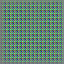

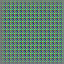

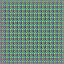

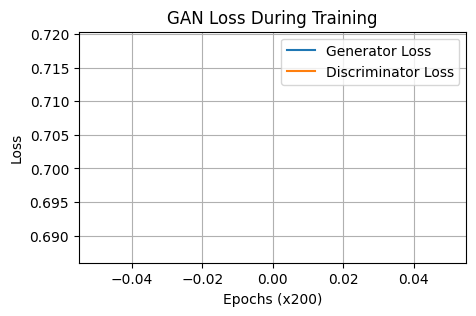

10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 988ms/step - d_loss: 0.6927 - g_loss: 0.7048
Epoch 2/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - d_loss: 0.6690 - g_loss: 0.7572
Epoch 3/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - d_loss: 0.6426 - g_loss: 0.7683
Epoch 4/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - d_loss: 0.5789 - g_loss: 0.7458
Epoch 5/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - d_loss: 0.5281 - g_loss: 0.9495
Epoch 6/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - d_loss: 0.5796 - g_loss: 0.9771
Epoch 7/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - d_loss: 0.5988 - g_loss: 0.8224
Epoch 8/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - d_loss: 0.4287 - g_loss: 0.9663
Epoch 9/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - d_loss: 0.6242 - g_loss: 0.8968
Epoch 10/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - d_loss: 0.4566 - g_loss: 1.3478
Epoch 11/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - d_loss: 1.1211 - g_loss: 0.6484
Epoch 12/10000
10/10 ━━━━━━━━━━━

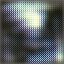

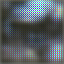

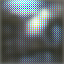

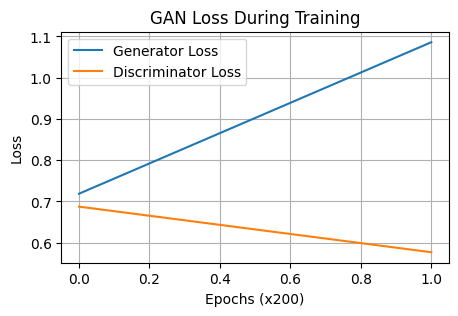

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - d_loss: 0.6020 - g_loss: 1.0663
Epoch 202/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.4821 - g_loss: 1.1891
Epoch 203/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5833 - g_loss: 0.8996
Epoch 204/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6571 - g_loss: 0.7645
Epoch 205/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6015 - g_loss: 0.9554
Epoch 206/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - d_loss: 0.5356 - g_loss: 1.1260
Epoch 207/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5062 - g_loss: 1.3023
Epoch 208/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5558 - g_loss: 1.0838
Epoch 209/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - d_loss: 0.8216 - g_loss: 0.8369
Epoch 210/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6931 - g_loss: 1.0388
Epoch 211/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - d_loss: 0.3693 - g_loss: 2.3601
Epoch 212/10000

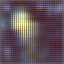

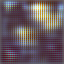

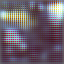

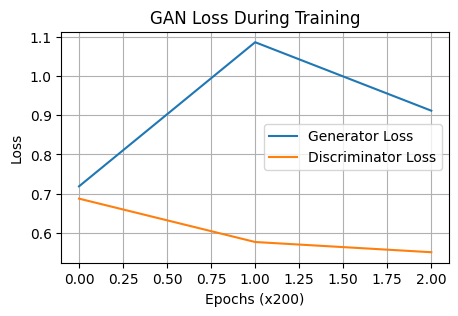

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - d_loss: 0.5448 - g_loss: 0.9381
Epoch 402/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7587 - g_loss: 0.7630
Epoch 403/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7455 - g_loss: 1.0096
Epoch 404/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.3244 - g_loss: 1.7841
Epoch 405/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.4358 - g_loss: 1.7844
Epoch 406/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5334 - g_loss: 1.6350
Epoch 407/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6840 - g_loss: 1.3267
Epoch 408/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.4555 - g_loss: 2.1342
Epoch 409/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.4888 - g_loss: 2.5609
Epoch 410/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 1.0393 - g_loss: 1.0031
Epoch 411/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - d_loss: 0.6759 - g_loss: 1.1654
Epoch 412/10000

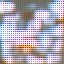

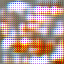

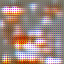

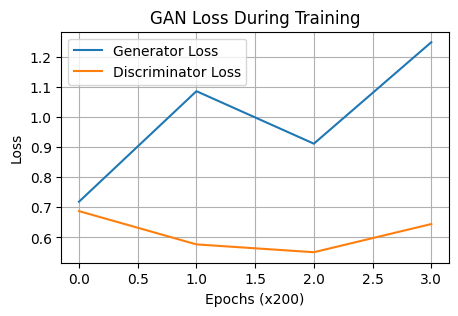

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - d_loss: 0.6742 - g_loss: 1.1450
Epoch 602/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.3652 - g_loss: 1.7332
Epoch 603/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.4500 - g_loss: 2.0175
Epoch 604/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.8451 - g_loss: 1.2253
Epoch 605/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.4064 - g_loss: 1.9410
Epoch 606/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7554 - g_loss: 1.2536
Epoch 607/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6922 - g_loss: 1.7324
Epoch 608/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5059 - g_loss: 1.9140
Epoch 609/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6979 - g_loss: 1.1515
Epoch 610/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.9678 - g_loss: 0.8199
Epoch 611/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - d_loss: 0.8578 - g_loss: 0.7759
Epoch 612/10000

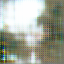

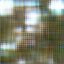

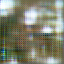

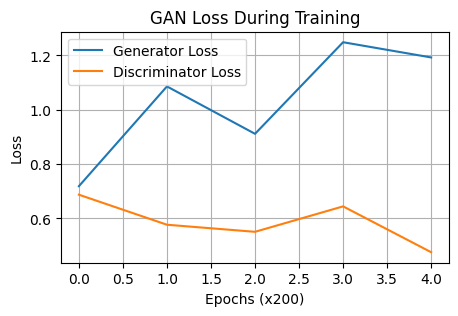

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - d_loss: 0.4691 - g_loss: 1.1352
Epoch 802/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5508 - g_loss: 1.2458
Epoch 803/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6540 - g_loss: 0.9618
Epoch 804/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7375 - g_loss: 0.8590
Epoch 805/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6653 - g_loss: 0.9299
Epoch 806/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5723 - g_loss: 1.0659
Epoch 807/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5759 - g_loss: 1.2206
Epoch 808/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5364 - g_loss: 1.4968
Epoch 809/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5124 - g_loss: 1.2753
Epoch 810/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5455 - g_loss: 1.2980
Epoch 811/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5686 - g_loss: 1.1919
Epoch 812/10000

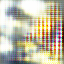

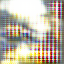

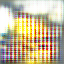

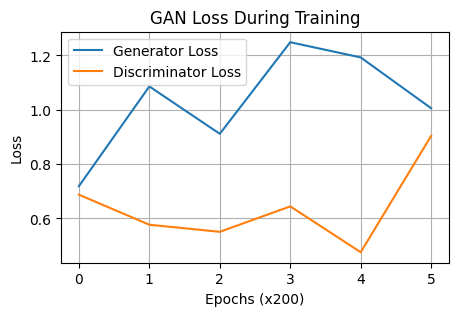

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - d_loss: 0.8528 - g_loss: 1.0365
Epoch 1002/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.8252 - g_loss: 1.0268
Epoch 1003/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.3726 - g_loss: 2.0257
Epoch 1004/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.1575 - g_loss: 3.5601
Epoch 1005/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5360 - g_loss: 2.5425
Epoch 1006/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 1.1960 - g_loss: 0.5309
Epoch 1007/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7228 - g_loss: 0.7625
Epoch 1008/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5025 - g_loss: 1.0605
Epoch 1009/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.4518 - g_loss: 1.1416
Epoch 1010/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.4561 - g_loss: 1.1404
Epoch 1011/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5057 - g_loss: 1.1130
Epoch

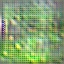

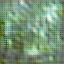

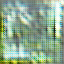

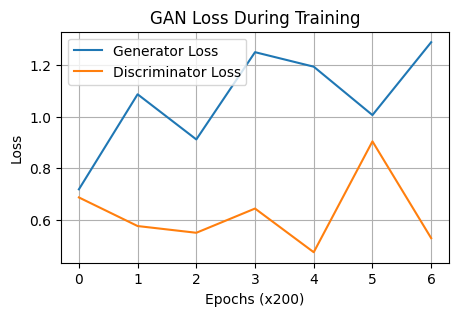

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - d_loss: 0.5204 - g_loss: 1.3437
Epoch 1202/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6515 - g_loss: 1.0191
Epoch 1203/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.8718 - g_loss: 0.8510
Epoch 1204/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.9355 - g_loss: 0.8078
Epoch 1205/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.8388 - g_loss: 0.8153
Epoch 1206/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.8774 - g_loss: 0.7857
Epoch 1207/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.4359 - g_loss: 1.5582
Epoch 1208/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.4373 - g_loss: 2.3233
Epoch 1209/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 1.0840 - g_loss: 1.5093
Epoch 1210/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 1.7722 - g_loss: 0.8605
Epoch 1211/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 1.1564 - g_loss: 0.9199
Epoch

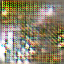

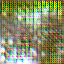

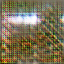

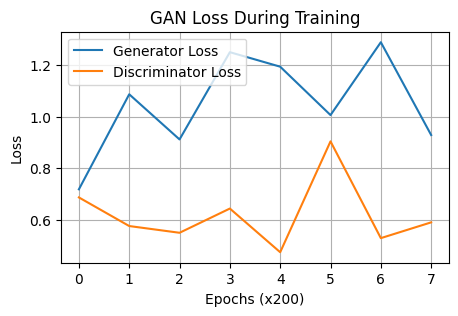

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - d_loss: 0.6150 - g_loss: 0.8954
Epoch 1402/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.5304 - g_loss: 1.0986
Epoch 1403/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.4497 - g_loss: 1.2563
Epoch 1404/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.4740 - g_loss: 1.2779
Epoch 1405/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5382 - g_loss: 1.0312
Epoch 1406/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5922 - g_loss: 1.1020
Epoch 1407/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5989 - g_loss: 1.1054
Epoch 1408/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5910 - g_loss: 1.1981
Epoch 1409/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.5645 - g_loss: 1.2486
Epoch 1410/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.5635 - g_loss: 1.2681
Epoch 1411/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - d_loss: 0.5950 - g_loss: 1.0667
Epoch

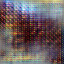

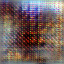

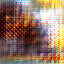

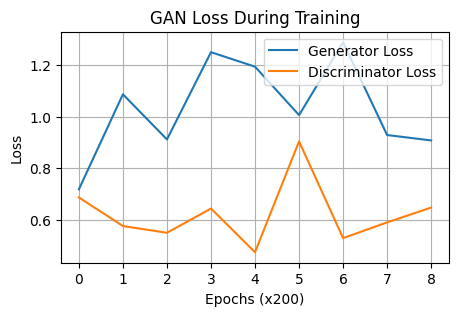

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - d_loss: 0.6474 - g_loss: 0.9218
Epoch 1602/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6468 - g_loss: 0.9244
Epoch 1603/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7121 - g_loss: 0.9533
Epoch 1604/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6977 - g_loss: 0.8559
Epoch 1605/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6835 - g_loss: 0.8770
Epoch 1606/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.5594 - g_loss: 1.1257
Epoch 1607/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.4518 - g_loss: 1.5045
Epoch 1608/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6210 - g_loss: 1.3798
Epoch 1609/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5814 - g_loss: 1.0492
Epoch 1610/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5236 - g_loss: 1.1530
Epoch 1611/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.5997 - g_loss: 1.1720
Epoch

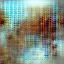

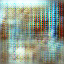

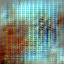

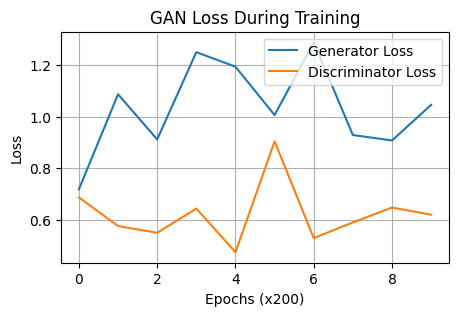

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - d_loss: 0.6359 - g_loss: 0.9804
Epoch 1802/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.5408 - g_loss: 1.1946
Epoch 1803/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.5393 - g_loss: 1.2555
Epoch 1804/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.8063 - g_loss: 0.8768
Epoch 1805/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.8322 - g_loss: 0.6663
Epoch 1806/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6918 - g_loss: 1.0570
Epoch 1807/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6492 - g_loss: 0.9720
Epoch 1808/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6817 - g_loss: 0.9987
Epoch 1809/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5982 - g_loss: 1.1075
Epoch 1810/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5492 - g_loss: 1.2688
Epoch 1811/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6457 - g_loss: 1.2345
Epoch

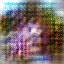

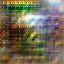

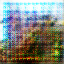

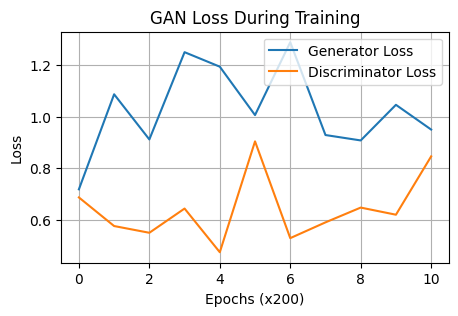

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - d_loss: 0.7388 - g_loss: 0.9372
Epoch 2002/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 1.0054 - g_loss: 0.8531
Epoch 2003/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - d_loss: 0.4132 - g_loss: 2.6614
Epoch 2004/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7504 - g_loss: 1.9026
Epoch 2005/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 1.1758 - g_loss: 0.7986
Epoch 2006/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7029 - g_loss: 0.9332
Epoch 2007/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6142 - g_loss: 1.0809
Epoch 2008/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.5511 - g_loss: 1.0870
Epoch 2009/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.4692 - g_loss: 1.3812
Epoch 2010/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.4947 - g_loss: 1.2240
Epoch 2011/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6687 - g_loss: 0.8457
Epoch

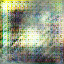

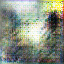

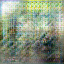

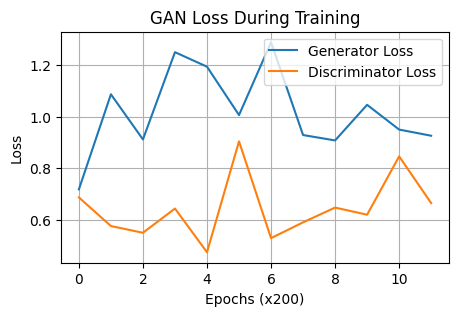

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - d_loss: 0.6795 - g_loss: 0.9252
Epoch 2202/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6439 - g_loss: 0.9184
Epoch 2203/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.5982 - g_loss: 1.0266
Epoch 2204/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.5764 - g_loss: 1.0285
Epoch 2205/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.5948 - g_loss: 1.0220
Epoch 2206/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - d_loss: 0.6180 - g_loss: 0.9791
Epoch 2207/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7078 - g_loss: 0.9369
Epoch 2208/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6121 - g_loss: 1.0852
Epoch 2209/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.5408 - g_loss: 1.3113
Epoch 2210/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7291 - g_loss: 0.9361
Epoch 2211/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.8833 - g_loss: 0.7217
Epoch

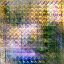

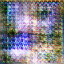

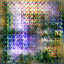

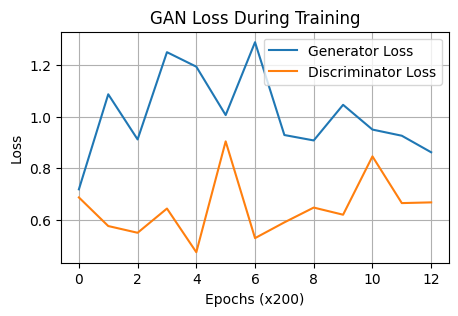

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - d_loss: 0.6822 - g_loss: 0.8336
Epoch 2402/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6553 - g_loss: 0.8552
Epoch 2403/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6457 - g_loss: 0.9563
Epoch 2404/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6244 - g_loss: 1.0691
Epoch 2405/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7136 - g_loss: 1.0586
Epoch 2406/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7252 - g_loss: 0.9850
Epoch 2407/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6566 - g_loss: 0.9663
Epoch 2408/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5974 - g_loss: 0.9725
Epoch 2409/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5836 - g_loss: 1.0282
Epoch 2410/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6335 - g_loss: 0.9375
Epoch 2411/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.8044 - g_loss: 0.8448
Epoch

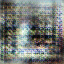

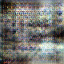

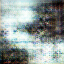

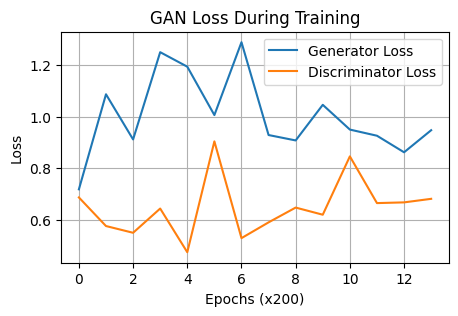

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - d_loss: 0.6767 - g_loss: 0.9576
Epoch 2602/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6683 - g_loss: 0.9098
Epoch 2603/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6357 - g_loss: 0.9596
Epoch 2604/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6621 - g_loss: 0.9368
Epoch 2605/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6571 - g_loss: 0.8944
Epoch 2606/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - d_loss: 0.6696 - g_loss: 0.8436
Epoch 2607/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6753 - g_loss: 0.8345
Epoch 2608/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6335 - g_loss: 0.8426
Epoch 2609/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6126 - g_loss: 0.9528
Epoch 2610/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6026 - g_loss: 0.9711
Epoch 2611/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6029 - g_loss: 0.9750
Epoch

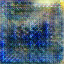

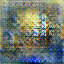

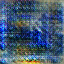

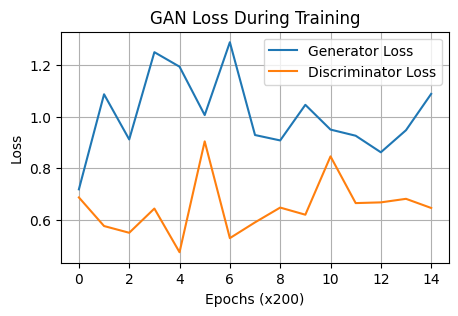

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - d_loss: 0.6741 - g_loss: 1.1177
Epoch 2802/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6557 - g_loss: 1.2259
Epoch 2803/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.8062 - g_loss: 0.8617
Epoch 2804/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.9782 - g_loss: 0.6006
Epoch 2805/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.8227 - g_loss: 0.8442
Epoch 2806/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6738 - g_loss: 1.0633
Epoch 2807/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6582 - g_loss: 1.1683
Epoch 2808/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6840 - g_loss: 1.0621
Epoch 2809/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7100 - g_loss: 0.9413
Epoch 2810/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - d_loss: 0.7228 - g_loss: 0.9262
Epoch 2811/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6664 - g_loss: 1.1129
Epoch

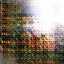

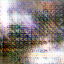

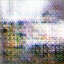

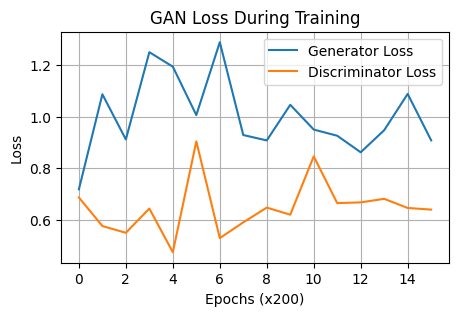

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - d_loss: 0.6565 - g_loss: 0.9126
Epoch 3002/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6177 - g_loss: 0.8693
Epoch 3003/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6641 - g_loss: 0.8282
Epoch 3004/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7434 - g_loss: 0.8501
Epoch 3005/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6694 - g_loss: 0.8614
Epoch 3006/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6519 - g_loss: 0.8421
Epoch 3007/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6569 - g_loss: 0.9218
Epoch 3008/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6634 - g_loss: 0.9252
Epoch 3009/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6767 - g_loss: 0.8618
Epoch 3010/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6147 - g_loss: 1.0316
Epoch 3011/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6433 - g_loss: 1.0440
Epoch

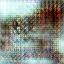

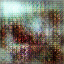

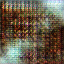

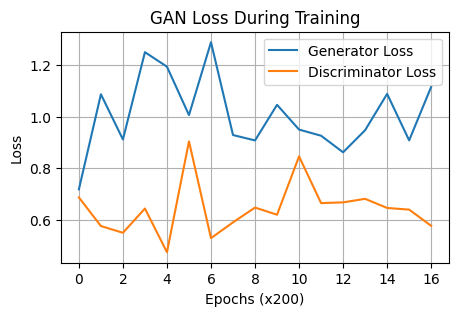

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - d_loss: 0.5470 - g_loss: 1.2131
Epoch 3202/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6344 - g_loss: 1.1579
Epoch 3203/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7121 - g_loss: 0.8877
Epoch 3204/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6768 - g_loss: 0.8794
Epoch 3205/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6419 - g_loss: 0.8377
Epoch 3206/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5952 - g_loss: 0.9860
Epoch 3207/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6161 - g_loss: 0.9656
Epoch 3208/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6630 - g_loss: 0.9008
Epoch 3209/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6696 - g_loss: 0.9886
Epoch 3210/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.5454 - g_loss: 1.0062
Epoch 3211/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5258 - g_loss: 1.1441
Epoch

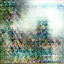

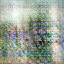

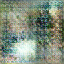

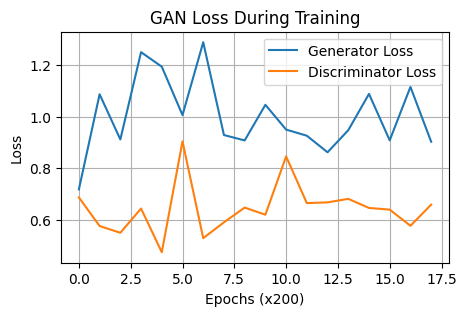

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - d_loss: 0.6543 - g_loss: 0.9187
Epoch 3402/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6558 - g_loss: 0.9231
Epoch 3403/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6112 - g_loss: 0.9216
Epoch 3404/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6093 - g_loss: 0.9526
Epoch 3405/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6144 - g_loss: 0.9960
Epoch 3406/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5386 - g_loss: 1.1175
Epoch 3407/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5147 - g_loss: 1.1181
Epoch 3408/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6290 - g_loss: 0.9877
Epoch 3409/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.8313 - g_loss: 0.6807
Epoch 3410/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7798 - g_loss: 0.7082
Epoch 3411/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5547 - g_loss: 1.0556
Epoch

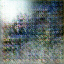

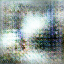

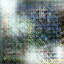

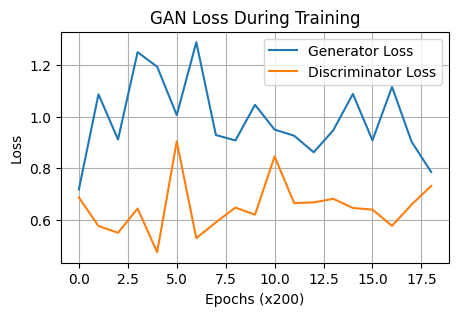

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - d_loss: 0.7435 - g_loss: 0.7948
Epoch 3602/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6916 - g_loss: 0.8337
Epoch 3603/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6308 - g_loss: 0.8785
Epoch 3604/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6372 - g_loss: 0.8831
Epoch 3605/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6799 - g_loss: 0.9264
Epoch 3606/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7129 - g_loss: 0.8422
Epoch 3607/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6555 - g_loss: 0.9339
Epoch 3608/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5335 - g_loss: 1.1166
Epoch 3609/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5573 - g_loss: 1.1833
Epoch 3610/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6563 - g_loss: 0.9623
Epoch 3611/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6743 - g_loss: 0.8560
Epoch

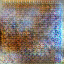

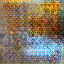

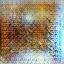

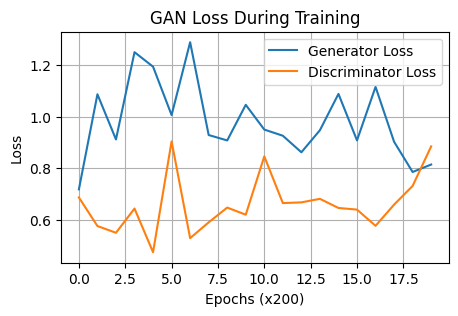

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - d_loss: 0.8318 - g_loss: 0.9068
Epoch 3802/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.9176 - g_loss: 0.8607
Epoch 3803/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6426 - g_loss: 1.2976
Epoch 3804/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5844 - g_loss: 1.5582
Epoch 3805/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7108 - g_loss: 0.9611
Epoch 3806/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - d_loss: 0.6838 - g_loss: 0.9844
Epoch 3807/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6342 - g_loss: 0.9184
Epoch 3808/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7682 - g_loss: 0.7118
Epoch 3809/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.8268 - g_loss: 0.6411
Epoch 3810/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6666 - g_loss: 0.8075
Epoch 3811/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5709 - g_loss: 0.9527
Epoch

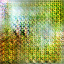

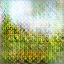

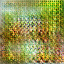

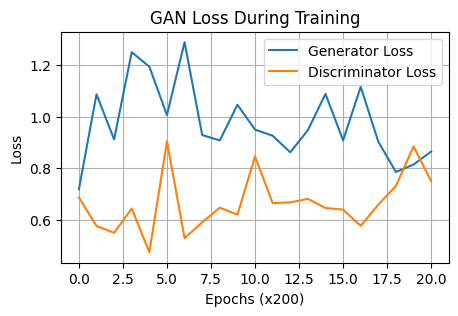

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - d_loss: 0.7705 - g_loss: 0.8321
Epoch 4002/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6474 - g_loss: 1.0384
Epoch 4003/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5247 - g_loss: 1.1556
Epoch 4004/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5403 - g_loss: 1.3020
Epoch 4005/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7276 - g_loss: 1.1686
Epoch 4006/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7885 - g_loss: 0.8896
Epoch 4007/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.5862 - g_loss: 1.0573
Epoch 4008/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.3932 - g_loss: 1.5083
Epoch 4009/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6489 - g_loss: 1.1056
Epoch 4010/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7853 - g_loss: 0.8000
Epoch 4011/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.5670 - g_loss: 0.9494
Epoch

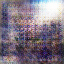

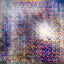

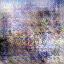

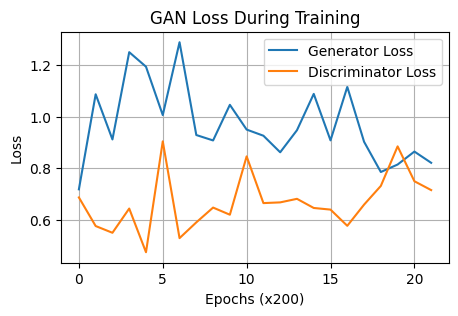

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - d_loss: 0.7241 - g_loss: 0.8386
Epoch 4202/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7188 - g_loss: 0.8305
Epoch 4203/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6736 - g_loss: 0.8595
Epoch 4204/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7823 - g_loss: 0.7793
Epoch 4205/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 1.0331 - g_loss: 0.6477
Epoch 4206/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7793 - g_loss: 0.9492
Epoch 4207/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5315 - g_loss: 1.1617
Epoch 4208/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7758 - g_loss: 0.9142
Epoch 4209/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.8029 - g_loss: 0.8599
Epoch 4210/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.8504 - g_loss: 0.8402
Epoch 4211/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - d_loss: 0.8129 - g_loss: 0.8169
Epoch

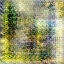

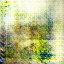

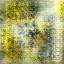

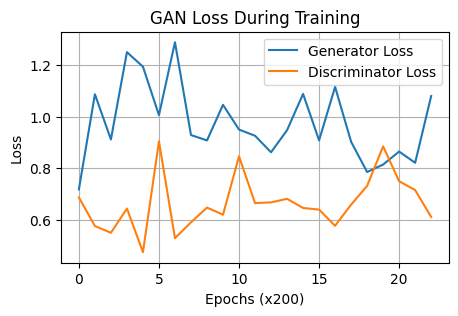

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - d_loss: 0.6598 - g_loss: 1.0441
Epoch 4402/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.4851 - g_loss: 1.2498
Epoch 4403/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5534 - g_loss: 1.1375
Epoch 4404/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6043 - g_loss: 1.0810
Epoch 4405/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7028 - g_loss: 0.9082
Epoch 4406/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7722 - g_loss: 0.7863
Epoch 4407/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7429 - g_loss: 0.7847
Epoch 4408/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6808 - g_loss: 0.9423
Epoch 4409/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7724 - g_loss: 1.0458
Epoch 4410/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7595 - g_loss: 0.9060
Epoch 4411/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6738 - g_loss: 0.9550
Epoch

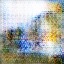

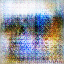

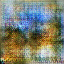

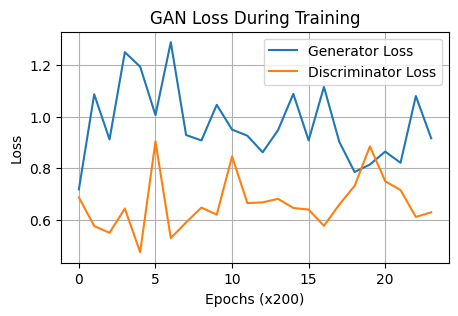

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - d_loss: 0.6189 - g_loss: 0.8942
Epoch 4602/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6541 - g_loss: 0.9385
Epoch 4603/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7347 - g_loss: 0.8680
Epoch 4604/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7088 - g_loss: 0.8511
Epoch 4605/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6729 - g_loss: 0.8772
Epoch 4606/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7333 - g_loss: 0.7971
Epoch 4607/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.8309 - g_loss: 0.6973
Epoch 4608/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.8869 - g_loss: 0.6790
Epoch 4609/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - d_loss: 0.7207 - g_loss: 0.8229
Epoch 4610/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6745 - g_loss: 0.9062
Epoch 4611/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6768 - g_loss: 0.9074
Epoch

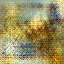

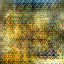

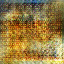

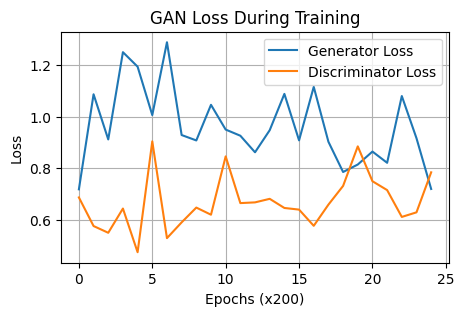

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - d_loss: 0.7907 - g_loss: 0.7029
Epoch 4802/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6734 - g_loss: 1.0125
Epoch 4803/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6500 - g_loss: 1.7060
Epoch 4804/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.9292 - g_loss: 1.2023
Epoch 4805/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.9582 - g_loss: 0.9241
Epoch 4806/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6264 - g_loss: 1.1657
Epoch 4807/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.4992 - g_loss: 1.2258
Epoch 4808/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6797 - g_loss: 0.8270
Epoch 4809/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.8818 - g_loss: 0.6964
Epoch 4810/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.8194 - g_loss: 0.6716
Epoch 4811/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7054 - g_loss: 0.7676
Epoch

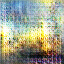

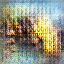

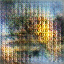

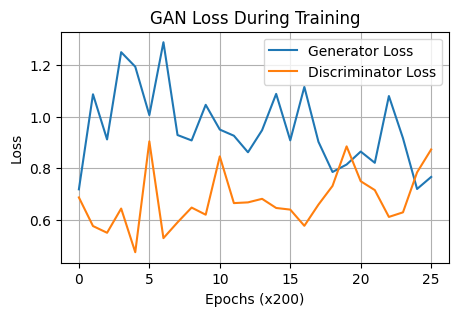

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - d_loss: 0.8592 - g_loss: 0.7851
Epoch 5002/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.8219 - g_loss: 0.7210
Epoch 5003/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5967 - g_loss: 1.0122
Epoch 5004/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.4568 - g_loss: 1.3132
Epoch 5005/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.5525 - g_loss: 1.2056
Epoch 5006/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7035 - g_loss: 0.8529
Epoch 5007/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7658 - g_loss: 0.8114
Epoch 5008/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7485 - g_loss: 0.8224
Epoch 5009/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7402 - g_loss: 0.7119
Epoch 5010/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - d_loss: 0.7296 - g_loss: 0.7326
Epoch 5011/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7639 - g_loss: 0.7529
Epoch

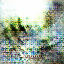

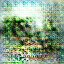

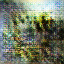

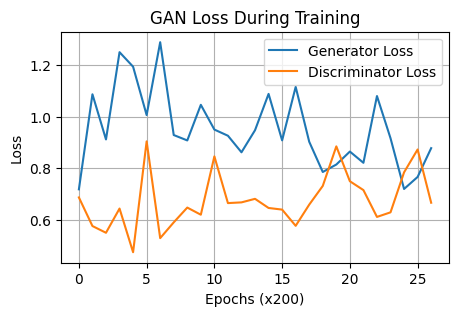

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - d_loss: 0.6750 - g_loss: 0.9183
Epoch 5202/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7095 - g_loss: 0.9880
Epoch 5203/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7579 - g_loss: 0.8239
Epoch 5204/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7812 - g_loss: 0.7353
Epoch 5205/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7854 - g_loss: 0.7549
Epoch 5206/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7306 - g_loss: 0.7426
Epoch 5207/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6688 - g_loss: 0.8396
Epoch 5208/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6971 - g_loss: 0.8150
Epoch 5209/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7088 - g_loss: 0.8299
Epoch 5210/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7077 - g_loss: 0.8707
Epoch 5211/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - d_loss: 0.6588 - g_loss: 0.9302
Epoch

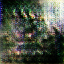

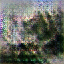

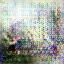

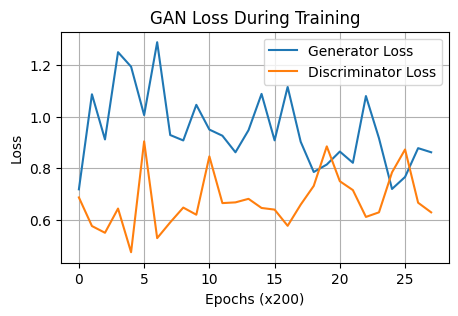

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - d_loss: 0.6515 - g_loss: 0.8424
Epoch 5402/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6410 - g_loss: 0.8749
Epoch 5403/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6618 - g_loss: 0.7551
Epoch 5404/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6935 - g_loss: 0.7211
Epoch 5405/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7168 - g_loss: 0.7697
Epoch 5406/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7050 - g_loss: 0.7787
Epoch 5407/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7378 - g_loss: 0.7729
Epoch 5408/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7336 - g_loss: 0.7268
Epoch 5409/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7003 - g_loss: 0.7933
Epoch 5410/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6632 - g_loss: 0.8149
Epoch 5411/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6547 - g_loss: 0.9042
Epoch

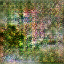

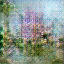

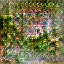

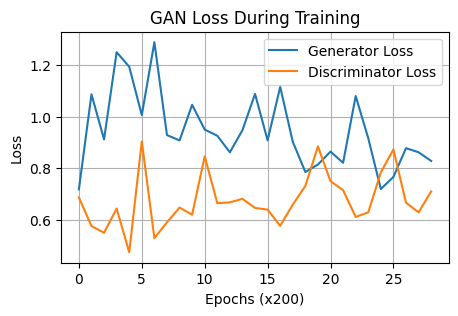

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - d_loss: 0.7053 - g_loss: 0.8529
Epoch 5602/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7446 - g_loss: 0.8156
Epoch 5603/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7905 - g_loss: 0.7990
Epoch 5604/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7885 - g_loss: 0.7583
Epoch 5605/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7819 - g_loss: 0.7479
Epoch 5606/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7446 - g_loss: 0.7506
Epoch 5607/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7046 - g_loss: 0.7743
Epoch 5608/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6447 - g_loss: 0.8596
Epoch 5609/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6024 - g_loss: 0.9136
Epoch 5610/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - d_loss: 0.6018 - g_loss: 0.8851
Epoch 5611/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6158 - g_loss: 0.8650
Epoch

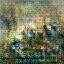

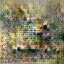

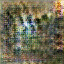

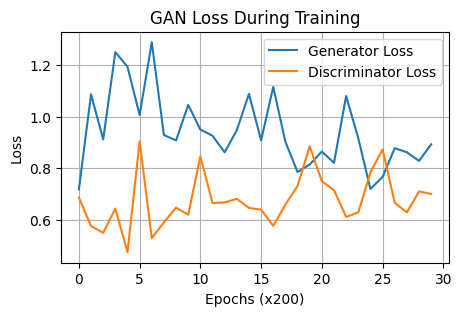

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - d_loss: 0.6957 - g_loss: 0.8940
Epoch 5802/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7404 - g_loss: 0.8234
Epoch 5803/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.8226 - g_loss: 0.7921
Epoch 5804/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.8235 - g_loss: 0.7432
Epoch 5805/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7661 - g_loss: 0.7457
Epoch 5806/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6715 - g_loss: 0.8738
Epoch 5807/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6007 - g_loss: 0.9707
Epoch 5808/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - d_loss: 0.5871 - g_loss: 0.9920
Epoch 5809/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6652 - g_loss: 0.9687
Epoch 5810/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7487 - g_loss: 0.8441
Epoch 5811/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7365 - g_loss: 0.8488
Epoch

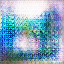

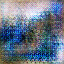

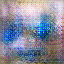

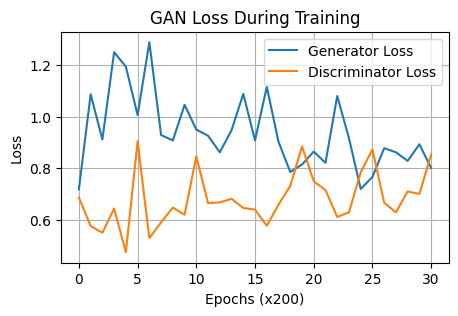

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - d_loss: 0.8061 - g_loss: 0.8405
Epoch 6002/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7783 - g_loss: 0.8452
Epoch 6003/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.4704 - g_loss: 1.4512
Epoch 6004/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6265 - g_loss: 1.1768
Epoch 6005/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.8407 - g_loss: 0.7847
Epoch 6006/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7547 - g_loss: 0.8604
Epoch 6007/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6203 - g_loss: 0.8742
Epoch 6008/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6188 - g_loss: 0.9300
Epoch 6009/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6809 - g_loss: 1.0383
Epoch 6010/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7983 - g_loss: 0.8424
Epoch 6011/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7337 - g_loss: 0.8342
Epoch

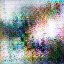

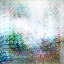

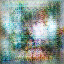

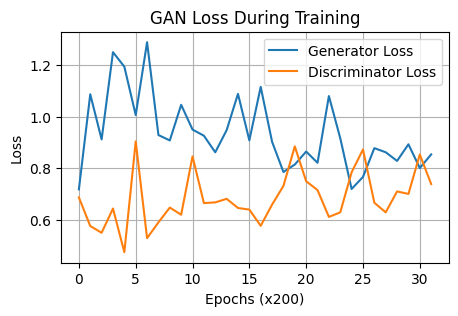

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - d_loss: 0.7252 - g_loss: 0.8586
Epoch 6202/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7309 - g_loss: 0.8496
Epoch 6203/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6234 - g_loss: 0.9787
Epoch 6204/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.5817 - g_loss: 1.0026
Epoch 6205/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.5784 - g_loss: 0.9654
Epoch 6206/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6266 - g_loss: 0.9988
Epoch 6207/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7171 - g_loss: 0.8882
Epoch 6208/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7799 - g_loss: 0.8412
Epoch 6209/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.8346 - g_loss: 0.8060
Epoch 6210/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7867 - g_loss: 0.8712
Epoch 6211/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.5777 - g_loss: 1.2213
Epoch

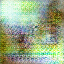

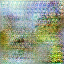

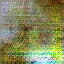

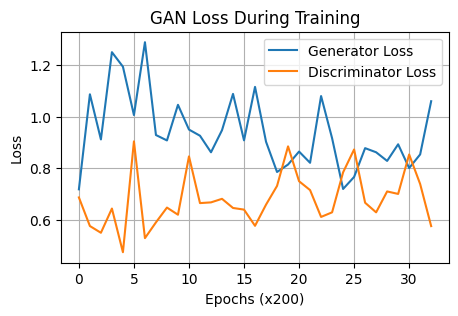

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - d_loss: 0.5761 - g_loss: 1.0472
Epoch 6402/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6333 - g_loss: 1.0831
Epoch 6403/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7127 - g_loss: 1.0159
Epoch 6404/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7411 - g_loss: 0.9661
Epoch 6405/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5470 - g_loss: 1.2416
Epoch 6406/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.4925 - g_loss: 1.3722
Epoch 6407/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.5211 - g_loss: 1.6220
Epoch 6408/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6759 - g_loss: 1.0235
Epoch 6409/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.9231 - g_loss: 0.6501
Epoch 6410/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.8325 - g_loss: 0.6142
Epoch 6411/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7707 - g_loss: 0.7544
Epoch

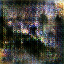

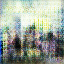

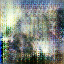

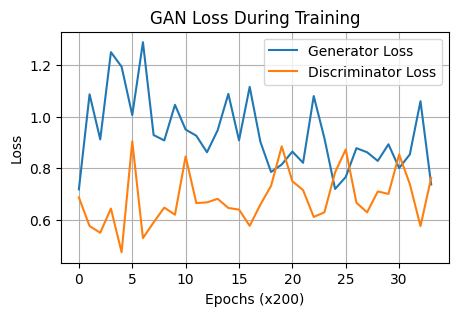

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - d_loss: 0.7752 - g_loss: 0.7140
Epoch 6602/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7206 - g_loss: 0.7598
Epoch 6603/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6736 - g_loss: 0.8332
Epoch 6604/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - d_loss: 0.6430 - g_loss: 0.9040
Epoch 6605/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6178 - g_loss: 0.9420
Epoch 6606/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6261 - g_loss: 0.8720
Epoch 6607/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6523 - g_loss: 0.8327
Epoch 6608/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6729 - g_loss: 0.7955
Epoch 6609/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6965 - g_loss: 0.7546
Epoch 6610/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6960 - g_loss: 0.8003
Epoch 6611/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6563 - g_loss: 0.8536
Epoch

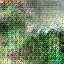

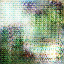

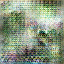

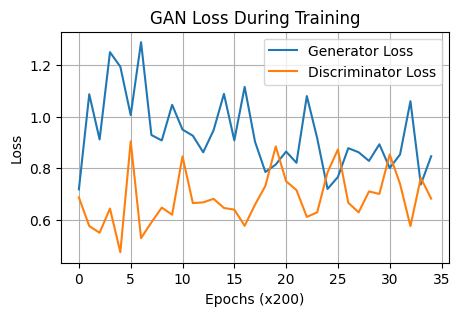

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - d_loss: 0.6907 - g_loss: 0.8990
Epoch 6802/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6685 - g_loss: 0.9109
Epoch 6803/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6711 - g_loss: 0.8861
Epoch 6804/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - d_loss: 0.6820 - g_loss: 0.8093
Epoch 6805/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7143 - g_loss: 0.7844
Epoch 6806/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - d_loss: 0.7263 - g_loss: 0.8054
Epoch 6807/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - d_loss: 0.6825 - g_loss: 0.7963
Epoch 6808/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6416 - g_loss: 0.9266
Epoch 6809/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5892 - g_loss: 0.9651
Epoch 6810/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - d_loss: 0.7018 - g_loss: 0.8038
Epoch 6811/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.8117 - g_loss: 0.7331
Epoch

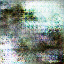

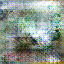

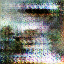

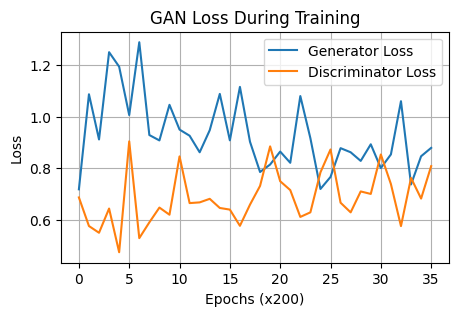

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - d_loss: 0.8374 - g_loss: 0.8785
Epoch 7002/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7150 - g_loss: 0.8988
Epoch 7003/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7813 - g_loss: 0.7832
Epoch 7004/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7883 - g_loss: 0.6966
Epoch 7005/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7019 - g_loss: 0.7548
Epoch 7006/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7146 - g_loss: 0.6933
Epoch 7007/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7071 - g_loss: 0.7046
Epoch 7008/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - d_loss: 0.6840 - g_loss: 0.7278
Epoch 7009/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6951 - g_loss: 0.7326
Epoch 7010/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7570 - g_loss: 0.7639
Epoch 7011/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - d_loss: 0.7480 - g_loss: 0.7061
Epoch

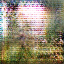

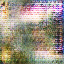

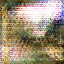

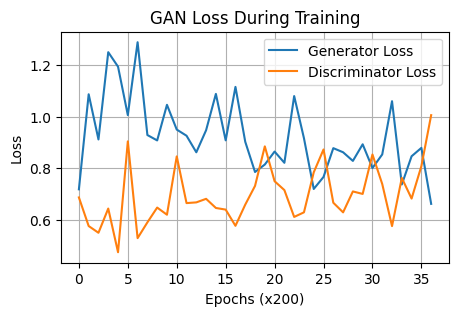

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - d_loss: 0.9977 - g_loss: 0.6979
Epoch 7202/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.9202 - g_loss: 0.7780
Epoch 7203/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7760 - g_loss: 0.8241
Epoch 7204/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6099 - g_loss: 0.9959
Epoch 7205/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5851 - g_loss: 0.9629
Epoch 7206/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7192 - g_loss: 0.8794
Epoch 7207/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7796 - g_loss: 0.7755
Epoch 7208/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6591 - g_loss: 0.9212
Epoch 7209/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6880 - g_loss: 0.8876
Epoch 7210/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7719 - g_loss: 0.8501
Epoch 7211/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7184 - g_loss: 0.8245
Epoch

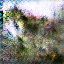

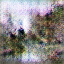

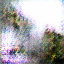

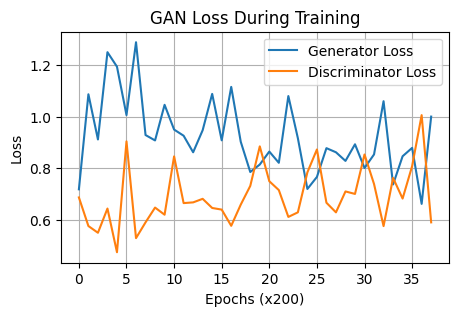

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - d_loss: 0.5716 - g_loss: 1.0655
Epoch 7402/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6291 - g_loss: 0.9227
Epoch 7403/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6716 - g_loss: 0.8500
Epoch 7404/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7027 - g_loss: 0.7884
Epoch 7405/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7105 - g_loss: 0.8068
Epoch 7406/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6765 - g_loss: 0.8496
Epoch 7407/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6477 - g_loss: 0.8757
Epoch 7408/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6284 - g_loss: 0.8582
Epoch 7409/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6485 - g_loss: 0.8333
Epoch 7410/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6642 - g_loss: 0.8738
Epoch 7411/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7043 - g_loss: 0.8761
Epoch

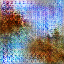

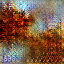

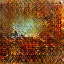

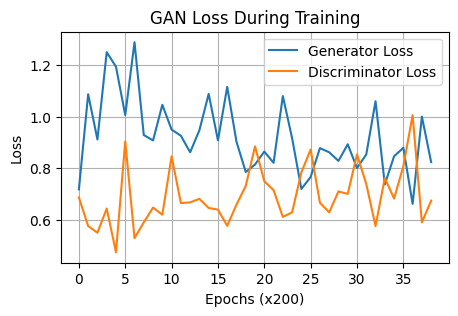

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - d_loss: 0.6677 - g_loss: 0.7953
Epoch 7602/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6545 - g_loss: 0.8608
Epoch 7603/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - d_loss: 0.6366 - g_loss: 0.9797
Epoch 7604/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6824 - g_loss: 0.8893
Epoch 7605/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7027 - g_loss: 0.8409
Epoch 7606/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6832 - g_loss: 0.8709
Epoch 7607/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6486 - g_loss: 0.8082
Epoch 7608/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6376 - g_loss: 0.8933
Epoch 7609/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6700 - g_loss: 0.8904
Epoch 7610/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7123 - g_loss: 0.7032
Epoch 7611/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6890 - g_loss: 0.7272
Epoch

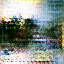

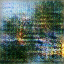

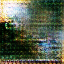

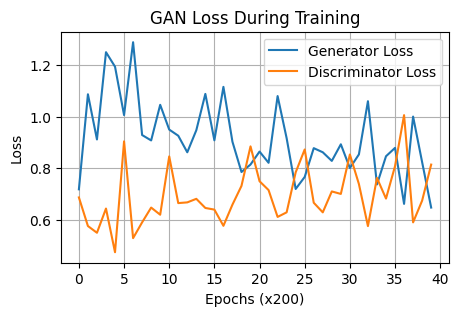

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - d_loss: 0.8292 - g_loss: 0.6268
Epoch 7802/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6822 - g_loss: 0.8098
Epoch 7803/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5553 - g_loss: 1.0124
Epoch 7804/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5640 - g_loss: 0.9344
Epoch 7805/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6384 - g_loss: 0.9338
Epoch 7806/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7595 - g_loss: 0.7981
Epoch 7807/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7979 - g_loss: 0.7273
Epoch 7808/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.8237 - g_loss: 0.7219
Epoch 7809/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7812 - g_loss: 0.7833
Epoch 7810/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7223 - g_loss: 0.8073
Epoch 7811/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6479 - g_loss: 0.8914
Epoch

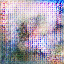

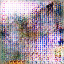

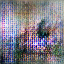

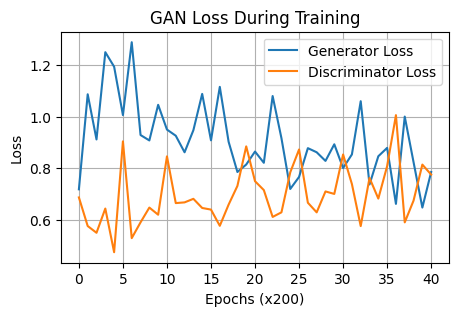

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - d_loss: 0.8267 - g_loss: 0.7314
Epoch 8002/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6215 - g_loss: 0.9401
Epoch 8003/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.5970 - g_loss: 0.9636
Epoch 8004/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6568 - g_loss: 0.9400
Epoch 8005/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6503 - g_loss: 0.9478
Epoch 8006/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6848 - g_loss: 0.8705
Epoch 8007/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6395 - g_loss: 0.8815
Epoch 8008/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7190 - g_loss: 0.7794
Epoch 8009/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7217 - g_loss: 0.7983
Epoch 8010/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6668 - g_loss: 0.8596
Epoch 8011/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6404 - g_loss: 0.9477
Epoch

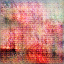

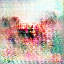

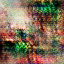

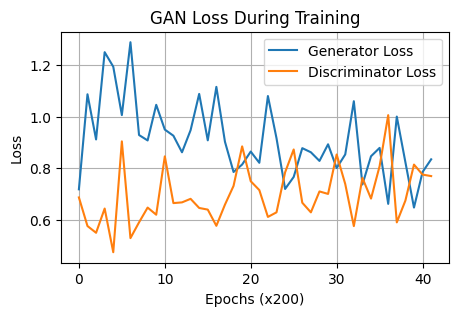

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - d_loss: 0.7722 - g_loss: 0.7994
Epoch 8202/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6883 - g_loss: 0.8934
Epoch 8203/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5416 - g_loss: 1.2317
Epoch 8204/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6845 - g_loss: 0.9871
Epoch 8205/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.8423 - g_loss: 0.7830
Epoch 8206/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7520 - g_loss: 0.7975
Epoch 8207/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6502 - g_loss: 0.8373
Epoch 8208/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - d_loss: 0.5947 - g_loss: 0.9299
Epoch 8209/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - d_loss: 0.5744 - g_loss: 0.9653
Epoch 8210/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6552 - g_loss: 0.8246
Epoch 8211/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6612 - g_loss: 0.8562
Epoch

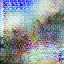

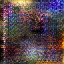

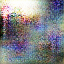

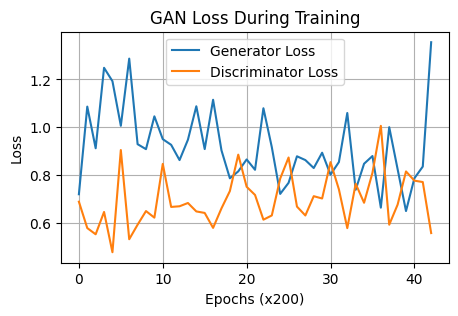

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - d_loss: 0.5246 - g_loss: 1.4060
Epoch 8402/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7726 - g_loss: 0.9179
Epoch 8403/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - d_loss: 0.9110 - g_loss: 0.6359
Epoch 8404/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7740 - g_loss: 0.7581
Epoch 8405/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6513 - g_loss: 0.9197
Epoch 8406/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6732 - g_loss: 1.0010
Epoch 8407/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.8042 - g_loss: 0.9485
Epoch 8408/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7092 - g_loss: 1.1617
Epoch 8409/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.5505 - g_loss: 1.4151
Epoch 8410/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - d_loss: 0.7129 - g_loss: 0.9173
Epoch 8411/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.5794 - g_loss: 1.1050
Epoch

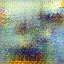

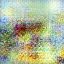

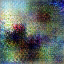

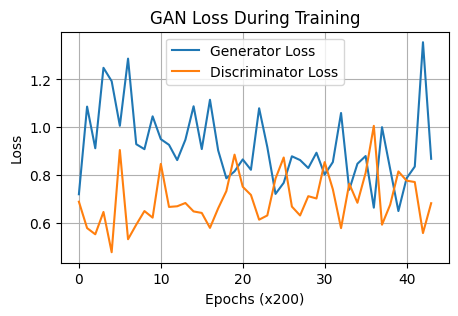

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - d_loss: 0.6491 - g_loss: 0.8955
Epoch 8602/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7511 - g_loss: 0.7445
Epoch 8603/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7343 - g_loss: 0.7853
Epoch 8604/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6747 - g_loss: 0.8083
Epoch 8605/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6519 - g_loss: 0.8672
Epoch 8606/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6375 - g_loss: 0.8531
Epoch 8607/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6520 - g_loss: 0.8200
Epoch 8608/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7055 - g_loss: 0.7719
Epoch 8609/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7202 - g_loss: 0.7721
Epoch 8610/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7667 - g_loss: 0.7720
Epoch 8611/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.8022 - g_loss: 0.8890
Epoch

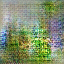

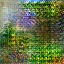

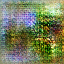

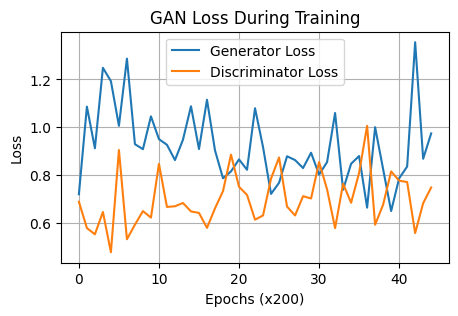

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - d_loss: 0.6923 - g_loss: 1.0179
Epoch 8802/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.8486 - g_loss: 0.8024
Epoch 8803/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.9024 - g_loss: 0.6232
Epoch 8804/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - d_loss: 0.7346 - g_loss: 0.7822
Epoch 8805/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5821 - g_loss: 1.0010
Epoch 8806/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5517 - g_loss: 1.0615
Epoch 8807/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6451 - g_loss: 0.9477
Epoch 8808/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - d_loss: 0.6379 - g_loss: 0.8851
Epoch 8809/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7039 - g_loss: 0.8317
Epoch 8810/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7479 - g_loss: 0.7161
Epoch 8811/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - d_loss: 0.7163 - g_loss: 0.8077
Epoch

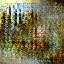

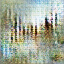

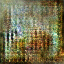

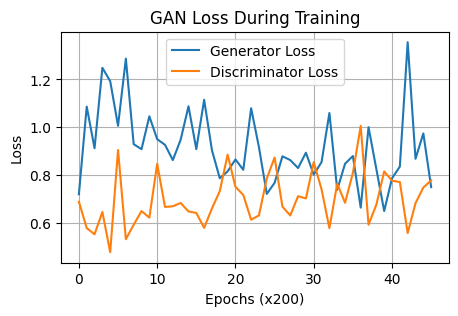

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - d_loss: 0.7750 - g_loss: 0.7230
Epoch 9002/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7221 - g_loss: 0.7814
Epoch 9003/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6323 - g_loss: 0.8928
Epoch 9004/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6663 - g_loss: 0.8606
Epoch 9005/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6675 - g_loss: 0.9094
Epoch 9006/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6220 - g_loss: 0.9926
Epoch 9007/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6103 - g_loss: 0.9896
Epoch 9008/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6595 - g_loss: 0.8263
Epoch 9009/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7202 - g_loss: 0.7236
Epoch 9010/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7198 - g_loss: 0.7500
Epoch 9011/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7148 - g_loss: 0.7418
Epoch

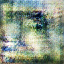

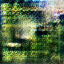

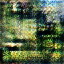

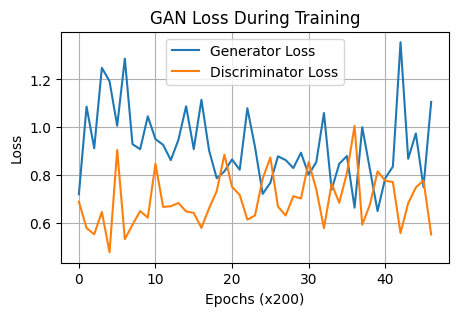

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - d_loss: 0.5824 - g_loss: 1.0842
Epoch 9202/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5269 - g_loss: 1.3124
Epoch 9203/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6675 - g_loss: 1.0302
Epoch 9204/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7754 - g_loss: 0.7989
Epoch 9205/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.8285 - g_loss: 0.6696
Epoch 9206/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7583 - g_loss: 0.6896
Epoch 9207/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6196 - g_loss: 0.8517
Epoch 9208/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.5985 - g_loss: 0.9648
Epoch 9209/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6468 - g_loss: 0.8679
Epoch 9210/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7639 - g_loss: 0.7253
Epoch 9211/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7650 - g_loss: 0.7632
Epoch

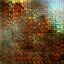

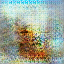

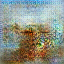

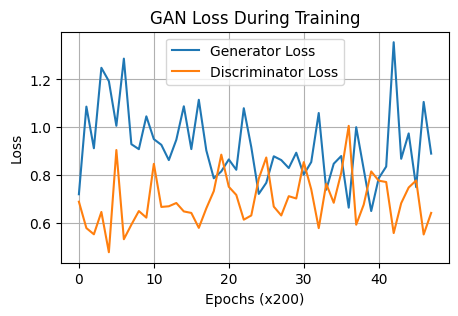

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - d_loss: 0.6365 - g_loss: 0.8699
Epoch 9402/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6185 - g_loss: 0.9225
Epoch 9403/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5965 - g_loss: 1.0345
Epoch 9404/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5827 - g_loss: 0.9996
Epoch 9405/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6200 - g_loss: 1.0419
Epoch 9406/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7114 - g_loss: 0.9735
Epoch 9407/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7898 - g_loss: 0.9473
Epoch 9408/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6975 - g_loss: 0.9344
Epoch 9409/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.5858 - g_loss: 1.1422
Epoch 9410/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6193 - g_loss: 1.0734
Epoch 9411/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6516 - g_loss: 0.9078
Epoch

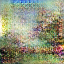

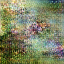

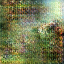

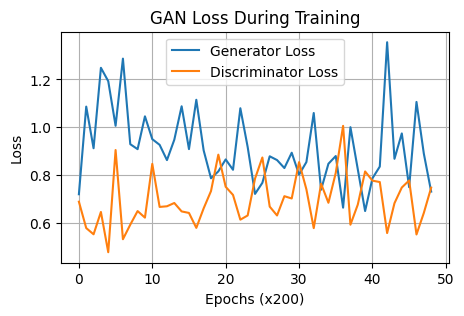

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - d_loss: 0.7585 - g_loss: 0.7304
Epoch 9602/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6815 - g_loss: 0.7875
Epoch 9603/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6206 - g_loss: 1.0671
Epoch 9604/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6944 - g_loss: 0.9045
Epoch 9605/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.9073 - g_loss: 0.7447
Epoch 9606/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6808 - g_loss: 0.9657
Epoch 9607/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.5355 - g_loss: 1.1644
Epoch 9608/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6437 - g_loss: 0.9616
Epoch 9609/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.6820 - g_loss: 0.9580
Epoch 9610/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6556 - g_loss: 0.9846
Epoch 9611/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7220 - g_loss: 0.8618
Epoch

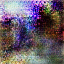

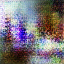

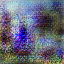

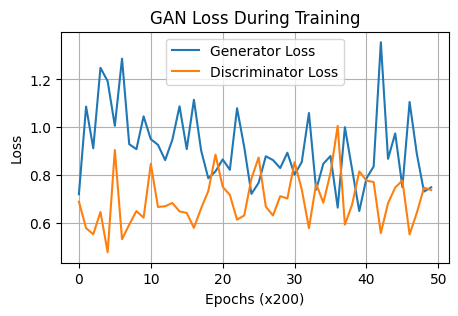

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - d_loss: 0.7376 - g_loss: 0.6919
Epoch 9802/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7098 - g_loss: 0.6640
Epoch 9803/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7137 - g_loss: 0.8961
Epoch 9804/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7108 - g_loss: 0.8786
Epoch 9805/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6517 - g_loss: 0.9654
Epoch 9806/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6109 - g_loss: 1.0600
Epoch 9807/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.6969 - g_loss: 0.9308
Epoch 9808/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.7396 - g_loss: 0.8092
Epoch 9809/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.7655 - g_loss: 0.8062
Epoch 9810/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - d_loss: 0.8038 - g_loss: 0.7743
Epoch 9811/10000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - d_loss: 0.8170 - g_loss: 0.8167
Epoch

In [21]:
history = gan.fit(
    dataset, epochs=epochs, callbacks=[GANMonitor(num_img=3, preview_freq=200,latent_dim=latent_dim)]
)

In [22]:
# # Now train the generator only for a couple epochs more
# gen_epochs = 50
# gan.freeze_discriminator = True
# history_gen = gan.fit(
#     dataset, epochs=gen_epochs, callbacks=[GANMonitor(num_img=3, preview_freq=10,latent_dim=latent_dim)]
# )

# Evaluating and saving the resulting images

In [23]:
random_latent_vectors = keras.random.normal(
      shape=(8, latent_dim), seed=42
)
generated_images = gan.generator(random_latent_vectors, training=False)

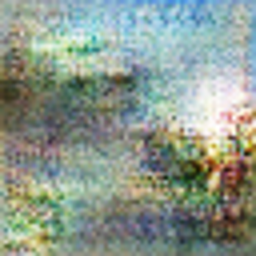

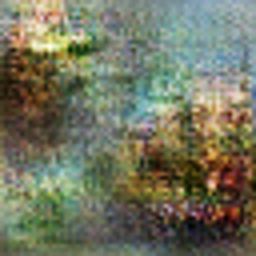

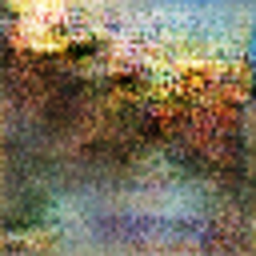

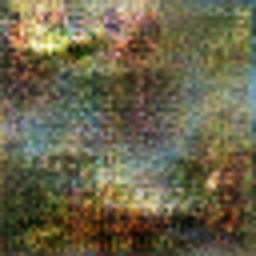

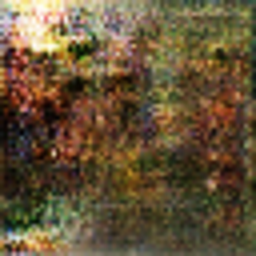

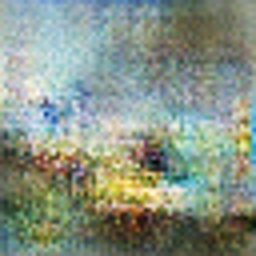

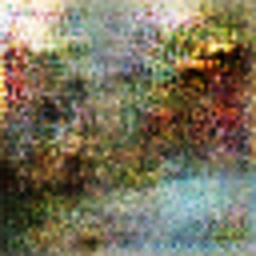

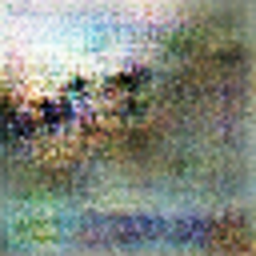

In [24]:
for img in generated_images:
    display(keras.utils.array_to_img(img).resize((256,256)))

In [25]:
batches=60
output_dir='images'

if not os.path.exists(output_dir):
    os.mkdir(output_dir)

for i in range(batches):
    
  random_latent_vectors = keras.random.normal(
      shape=(batch_size, latent_dim), seed=42
  )
  generated_images = gan.generator(random_latent_vectors)
  for j,img in enumerate(generated_images):
      keras.utils.array_to_img(img).resize((256,256)).save(os.path.join(output_dir,f"batch_{i}_img_{j}.jpg"))


In [26]:
import zipfile

def zip_folder(folder_path, output_zip_path):
    """
    Zips a folder and its contents.

    Args:
        folder_path: The path to the folder to zip.
        output_zip_path: The path to the output zip file.  If the file
                         exists, it will be overwritten.
    Raises:
        FileNotFoundError: If the folder_path does not exist.
        ValueError: If `folder_path` is not a directory.
    """

    if not os.path.exists(folder_path):
        raise FileNotFoundError(f"Folder '{folder_path}' not found.")

    if not os.path.isdir(folder_path):
        raise ValueError(f"'{folder_path}' is not a directory.")

    try:
        with zipfile.ZipFile(output_zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
            for root, _, files in os.walk(folder_path):
                for file in files:
                    file_path = os.path.join(root, file)
                    arcname = os.path.relpath(file_path, folder_path)  # Important for correct paths within the archive
                    zipf.write(file_path, arcname=arcname)
        print(f"Folder '{folder_path}' zipped successfully to '{output_zip_path}'")

    except Exception as e:
        print(f"An error occurred during zipping: {e}")



In [27]:
zip_folder(output_dir,'images.zip')

Folder 'images' zipped successfully to 'images.zip'


In [28]:
!rm -rf images

# Conclusions



In this notebook, we implemented a DCGAN to generate images resembling Monet's style.

We observed the training process through generated image previews and loss plots, 

showcasing the evolution of the generator's ability to mimic the artistic style.

Further improvements could involve exploring advanced architectures (CycleGAN, BigGAN),
hyperparameter tuning, and experimenting with different loss functions to enhance image quality and fidelity to Monet's style.  The small dataset size might have limited the performance, and using a larger, more diverse dataset might yield superior results, which calls for also experimenting with data augmentation.
